# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx").head(30000)
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
len(df)
#81937 but going back for 30,000

30000

In [4]:
df.shape

(30000, 15)

In [5]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [6]:
print("This is a dataset of dog licenses in NYC. Each row describes a dog.")
print("The animal birth column describes the birthdate in date format.")
print("The animal name column gives the animal's name. Most values in there are strings.")

This is a dataset of dog licenses in NYC. Each row describes a dog.
The animal birth column describes the birthdate in date format.
The animal name column gives the animal's name. Most values in there are strings.


# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. How many dogs were given licenses in November 2014?
2. Do people buy (and license) more dogs in any season?
3. What was the most popular breed for each month/year recorded?
4. The longest animal name licensed in the set

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
#print(list(df.columns))

new_names = []
for column in df.columns:
    new_names.append(column.replace(" ", "_").lower())    

df.columns = new_names

<AxesSubplot:>

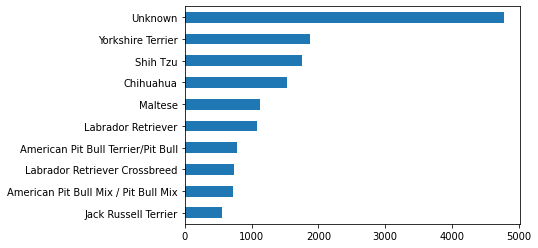

In [8]:
df.primary_breed.value_counts().head(10).sort_values(ascending=True).plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

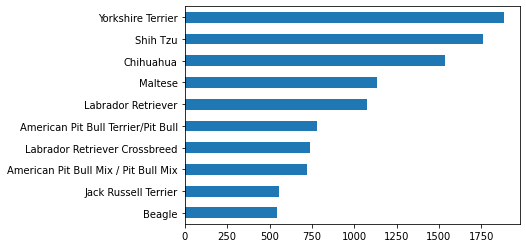

In [9]:
import numpy as np
df.primary_breed = df.primary_breed.replace({"Unknown": np.nan})

df.primary_breed.dropna().value_counts().head(10).sort_values(ascending=True).plot(kind="barh")

## What are the most popular dog names?

In [10]:
df.animal_name = df.animal_name.replace({"UNKNOWN": np.nan})
df.animal_name.dropna().value_counts().head(10)

Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Name: animal_name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
print("yes, 6 are named shane:")
df[df.animal_name == "Shane"]

yes, 6 are named shane:


,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date
4904,11361,Shane,M,Labrador Retriever,NaN,BLOND,NaN,NaN,2004-01-01,Yes,No,Yes,2015-04-29 13:07:47.520,2015-04-29,2016-06-08
12847,10025,Shane,M,American Pit Bull Terrier/Pit Bull,NaN,Tan,NaN,NaN,2012-07-01,Yes,NaN,Yes,2015-06-13 18:09:26.107,2015-06-13,2016-06-13
19790,10312,Shane,M,Golden Retriever,NaN,Gold,White,NaN,2014-04-01,Yes,NaN,Yes,2015-07-12 10:57:48.543,2015-07-12,2016-07-12
20970,10033,Shane,M,"Schnauzer, Miniature",NaN,SILVER,BLACK,GRAY,2009-10-01,No,No,Yes,2015-07-17 11:48:00.093,2015-07-17,2016-07-21
21891,11370,Shane,M,NaN,NaN,BLACK,TAN,WHITE,2012-02-01,Yes,No,Yes,2015-07-22 12:52:29.047,2015-07-22,2016-08-23
22517,11238,Shane,M,Pug,NaN,TAN,BLACK,BROWN,2000-01-01,No,No,No,2015-07-24 10:40:57.973,2015-07-24,2016-07-30


In [12]:
#df[df.animal_name == "Max"].animal_name.value_counts()
#df[df.animal_name == "Maxwell"].animal_name.value_counts()

print("There are", len(df[df.animal_name == "Max"]), "dogs named Max.")
print("There are", len(df[df.animal_name == "Maxwell"]), "dogs named Maxwell.")

There are 202 dogs named Max.
There are 11 dogs named Maxwell.


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [13]:
print(df.guard_or_trained.value_counts(normalize=True)*100)
print("\n")
print(".08% of registered dogs are guard dogs or trained guard dogs.")

No     99.914254
Yes     0.085746
Name: guard_or_trained, dtype: float64


.08% of registered dogs are guard dogs or trained guard dogs.


## What are the actual numbers?

In [14]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [15]:
#df.guard_or_trained.value_counts(dropna=False)
print("There are 10,174 dogs with null values in the guard column.")

There are 10,174 dogs with null values in the guard column.


## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df.guard_or_trained = df.guard_or_trained.replace({np.nan: "No"})
df.guard_or_trained.value_counts(dropna=False)

No     29983
Yes       17
Name: guard_or_trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [17]:
df[df.guard_or_trained == "Yes"].primary_breed.value_counts()

#lol a yorkie as a guard dog

German Shepherd Dog           3
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Schnauzer, Miniature          1
Shih Tzu                      1
Rottweiler                    1
Yorkshire Terrier             1
Poodle, Standard              1
Golden Retriever              1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [18]:
df['birth_year'] = df.animal_birth.apply(lambda birth: birth.year)
print(df['birth_year'])

0        2007
1        2013
2        2014
3        2008
4        2014
         ... 
29995    2010
29996    2010
29997    2014
29998    2009
29999    2012
Name: birth_year, Length: 30000, dtype: int64


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [19]:
df['dog_age'] = 2020 - df['birth_year']

#print(df) to check it implemented

print(f'NYC dogs are {df.dog_age.mean():.0f} years old on average.')

NYC dogs are 11 years old on average.


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [20]:
neighborhoods = pd.read_csv("zipcodes-neighborhoods.csv")

merged = df.merge(neighborhoods, 
         left_on = 'owner_zip_code', 
         right_on = 'zip', 
         how = 'left')

merged = merged.drop(columns=['zip'])

merged

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,birth_year,dog_age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,13,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,7,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,12,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6,Greenwich Village and Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,10,West Queens,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,10,Southwest Queens,Queens
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,6,Southwest Brooklyn,Brooklyn
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,11,Northwest Brooklyn,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [21]:
merged = merged.replace({'Unknown' : np.nan, 'unknown': np.nan})

print("Most Popular Names and Counts per Borough:")
borough_list = ["Bronx", "Manhattan", "Queens", "Brooklyn", "Staten Island"]
for borough in borough_list:
    print(borough)
    print(merged[merged.borough == borough].animal_name.value_counts().head(1))
    print("---")

print("The most popular dog name in the Upper East Side is", merged[merged.neighborhood == "Upper East Side"].animal_name.value_counts().head(1).index[0], ".")
print("There are", merged[merged.neighborhood == "Upper East Side"].animal_name.value_counts().head(1).values[0], "of them in the UES.")

Most Popular Names and Counts per Borough:
Bronx
Bella    22
Name: animal_name, dtype: int64
---
Manhattan
Lola    71
Name: animal_name, dtype: int64
---
Queens
Max    50
Name: animal_name, dtype: int64
---
Brooklyn
Max    46
Name: animal_name, dtype: int64
---
Staten Island
Max    27
Name: animal_name, dtype: int64
---
The most popular dog name in the Upper East Side is Charlie .
There are 19 of them in the UES.


## What is the most common dog breed in each of the neighborhoods of NYC?

In [22]:
print("Most Popular Breeds and Counts per Borough:")
borough_list = ["Bronx", "Manhattan", "Queens", "Brooklyn", "Staten Island"]
for borough in borough_list:
    print(borough)
    print(merged[merged.borough == borough].primary_breed.value_counts().head(1))
    print("---")

Most Popular Breeds and Counts per Borough:
Bronx
Yorkshire Terrier    250
Name: primary_breed, dtype: int64
---
Manhattan
Chihuahua    511
Name: primary_breed, dtype: int64
---
Queens
Yorkshire Terrier    434
Name: primary_breed, dtype: int64
---
Brooklyn
Yorkshire Terrier    501
Name: primary_breed, dtype: int64
---
Staten Island
Yorkshire Terrier    171
Name: primary_breed, dtype: int64
---


## What breed of dogs are the least likely to be spayed? Male or female?

In [23]:
print("Male Spayed %:")
print(df[df.animal_gender == "M"].spayed_or_neut.value_counts(normalize="true"))
print('\n')

print("Female Spayed %:")
print(df[df.animal_gender == "F"].spayed_or_neut.value_counts(normalize="true"))

print('\n')
print("Male dogs are least likely to be spayed")

Male Spayed %:
Yes    0.791856
No     0.208144
Name: spayed_or_neut, dtype: float64


Female Spayed %:
Yes    0.85785
No     0.14215
Name: spayed_or_neut, dtype: float64


Male dogs are least likely to be spayed


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [24]:
colors = []
for color in df.animal_dominant_color:
    colors.append(str(color).lower())

df.animal_dominant_color = colors

In [25]:
df[(df.animal_dominant_color == "black") & (df.animal_secondary_color.isnull()) |
  (df.animal_dominant_color == "grey") & (df.animal_secondary_color.isnull()) | 
   ((df.animal_dominant_color == "gray") & (df.animal_secondary_color.isnull()))|
  (df.animal_dominant_color == "white") & (df.animal_secondary_color.isnull())]

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,birth_year,dog_age
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,6
19,10002,Avery,F,American Pit Bull Terrier/Pit Bull,NaN,gray,NaN,NaN,2014-06-01,No,No,No,2014-09-13 15:55:11.457,2014-09-13,2019-09-13,2014,6
41,10023,Joey,F,Labrador Retriever Crossbreed,NaN,black,NaN,NaN,2010-03-01,Yes,No,Yes,2014-09-14 21:05:27.303,2014-09-14,2017-07-30,2010,10
55,10467,Angel,M,Bichon Frise,NaN,white,NaN,NaN,2000-11-01,Yes,No,Yes,2014-09-15 12:35:39.320,2014-09-15,2017-10-31,2000,20
56,10467,PEPI,M,NaN,TOY MALTESE,white,NaN,NaN,2004-01-01,Yes,No,Yes,2014-09-15 12:38:27.453,2014-09-15,2019-10-31,2004,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29955,10005,Bili,M,Maltese,NaN,white,NaN,NaN,2015-05-01,No,No,Yes,2015-08-22 17:09:46.157,2015-08-22,2016-08-22,2015,5
29957,11429,Portland,M,American Pit Bull Mix / Pit Bull Mix,NaN,gray,NaN,NaN,2014-04-01,Yes,No,Yes,2015-08-22 17:13:14.537,2015-08-22,2016-08-22,2014,6
29966,11377,DIDI,F,"Poodle, Toy",NaN,black,NaN,NaN,2012-11-01,Yes,No,Yes,2015-08-22 17:32:28.813,2015-08-22,2016-07-29,2012,8
29992,11205,Happy,M,NaN,bichon frise mix,white,NaN,NaN,2004-01-01,Yes,No,Yes,2015-08-22 18:49:47.973,2015-08-22,2016-09-21,2004,16


In [26]:
monochrome_num = df[(df.animal_dominant_color == "black") & (df.animal_secondary_color.isnull()) |
  (df.animal_dominant_color == "grey") & (df.animal_secondary_color.isnull()) | 
   ((df.animal_dominant_color == "gray") & (df.animal_secondary_color.isnull()))|
  (df.animal_dominant_color == "white") & (df.animal_secondary_color.isnull())] \
    .animal_dominant_color.value_counts().sum()

print(f'There are {monochrome_num:,} monochrome dogs in the list.')

There are 4,156 monochrome dogs in the list.


## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

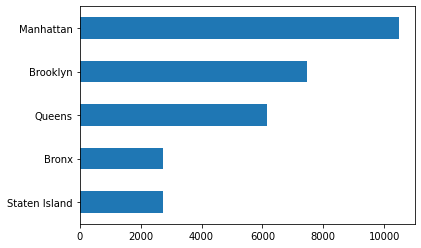

In [27]:
merged.borough.value_counts().sort_values(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [28]:
pops = pd.read_csv("boro_population.csv")

per_cap_df = merged.borough.value_counts().reset_index()
per_cap_df = per_cap_df.rename(columns = {'index': 'borough', 'borough': 'count'})

per_cap_df = per_cap_df.merge(pops, 
         left_on = 'borough', 
         right_on = 'borough', 
         how = 'left')

per_cap_df['per_capita'] = per_cap_df['count'] / per_cap_df['population']

top_borough = per_cap_df.sort_values(by = 'per_capita', ascending=False).head(1).borough.values[0]

print(f'{top_borough} has the most dogs per capita.')

Manhattan has the most dogs per capita.


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:ylabel='borough,borough,primary_breed'>

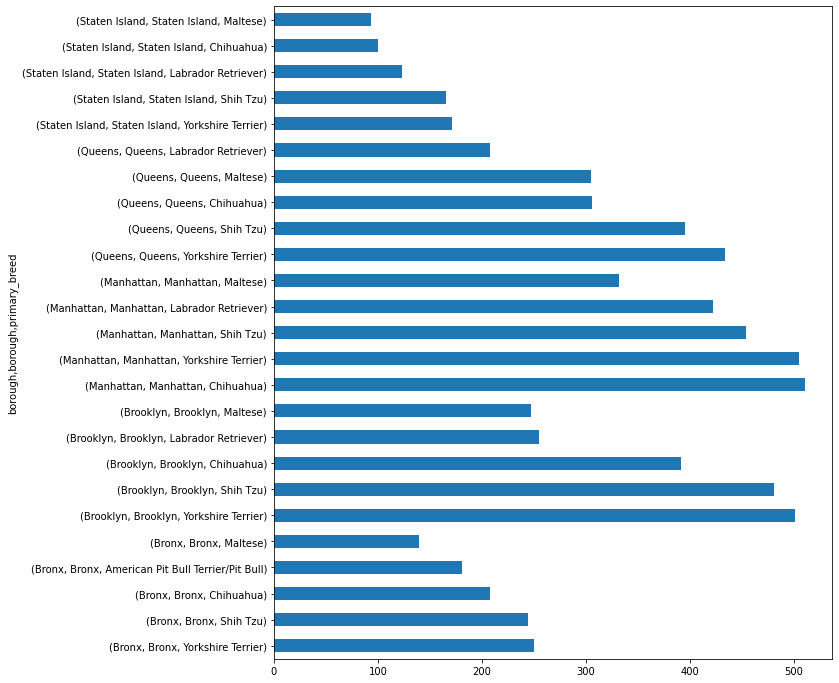

In [29]:
merged.groupby('borough').primary_breed.value_counts().groupby(level=0).nlargest(5).plot(kind='barh', figsize=(10, 12))

## What percentage of dogs are not guard dogs?

In [30]:
not_guard_pct = df.guard_or_trained.value_counts(normalize = True)["No"]

print(f'{not_guard_pct * 100 :.2f}% are not guard dogs.')

99.94% are not guard dogs.
